In [62]:
# Importong Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [63]:
HR_Dataset = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [64]:
HR_Dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

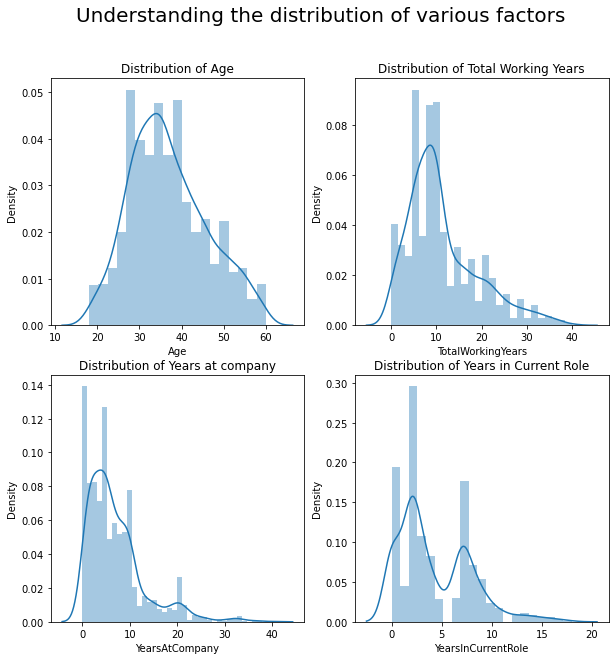

In [65]:
# Density Plots of Age, Working Years, Years at Present Organization and Years in Current Role

fig,ax = plt.subplots(2,2, figsize=(10,10))
plt.suptitle("Understanding the distribution of various factors", fontsize=20)
# Plot on 1st axes
sns.distplot(HR_Dataset['Age'], ax = ax[0,0])
ax[0][0].set_title('Distribution of Age')
sns.distplot(HR_Dataset['TotalWorkingYears'], ax = ax[0,1])
# Plot on IInd axes
ax[0][1].set_title('Distribution of Total Working Years')
sns.distplot(HR_Dataset['YearsAtCompany'], ax = ax[1,0])
# Plot on IIIrd axes
ax[1][0].set_title('Distribution of Years at company')
sns.distplot(HR_Dataset['YearsInCurrentRole'], ax = ax[1,1])
# Plot on IV the axes
ax[1][1].set_title('Distribution of Years in Current Role')
plt.show() 

In [66]:
# From the plots, we find that majority of the employees are in the age group of 35-40 years and have a total experience of around 8-10 years.
# They have typically spent around 2-4 years at the current organization and have spent 2-3 years in the current role they are in.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


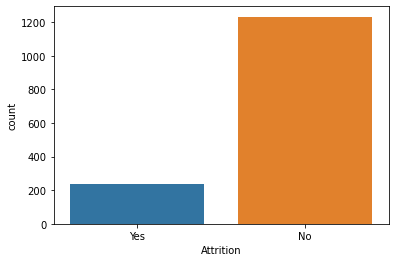

In [67]:
# Count Plot

sns.countplot(HR_Dataset['Attrition'])
plt.show()

In [68]:
# Above plot shows that around 250 people have left the organization while the organization has been able to retain around 1200 people.

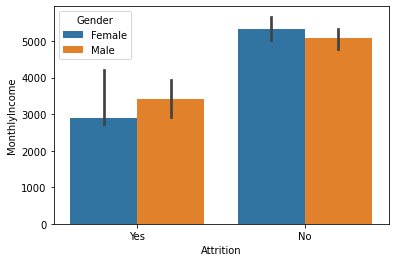

In [69]:
# Bar Plot


#Bar plot of MOnthly income from the rate of attrition according to gender
#Estimator used is median
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'Gender',data=HR_Dataset, estimator=median)
# hue= Categorical variable , estimator- Statistical function to estimate within each categorical bin.
plt.show()

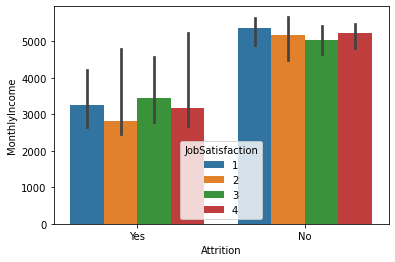

In [70]:
#Bar plot of Job Satisfaction with respect to Monthly income from home according to gender
#Estimator used is median
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'JobSatisfaction',data=HR_Dataset, estimator=median)# hue= Categorical variable , estimator- Statistical function to estimate within each categorical bin.
plt.show()

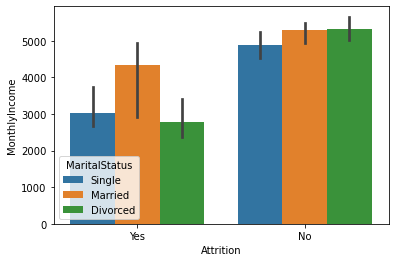

In [71]:
#Bar plot of Job Satisfaction with respect to Monthly income from home according to gender
#Estimator used is median
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'MaritalStatus',data=HR_Dataset, estimator=median)
# hue= Categorical variable , estimator- Statistical function to estimate within each categorical bin
plt.show()

In [72]:
# We can conclude that people with less monthlyincome (around 3000 units) are likely to leave the organization than those with better income (around 5000 units).

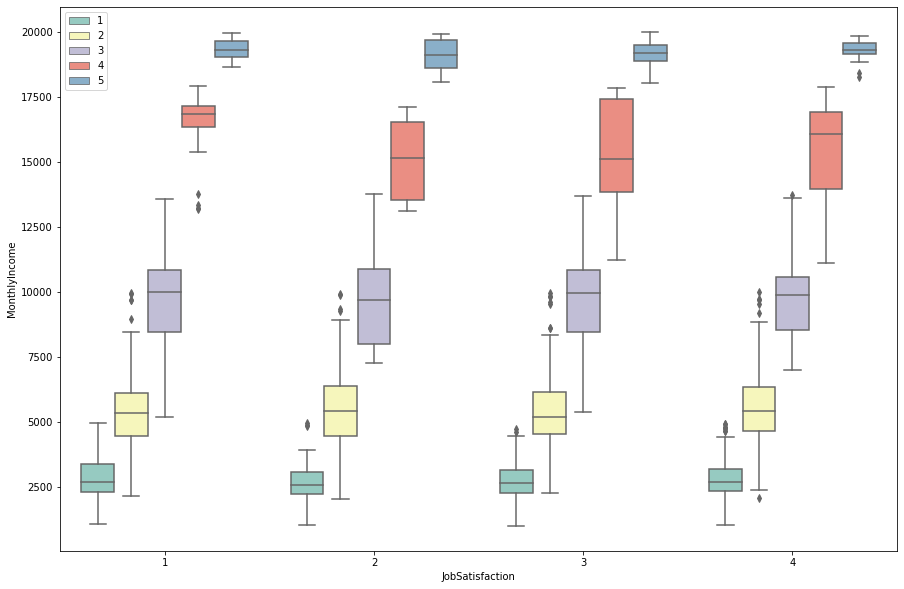

In [73]:
# Box Plot

f,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x='JobSatisfaction', y='MonthlyIncome', data=HR_Dataset, hue='JobLevel',palette='Set3')
plt.legend(loc='best')
plt.show()

In [74]:
# We can clearly observe the difference in monthly income across different job levels. The difference in the monthly income is observed by the median value for different job satisfaction level.

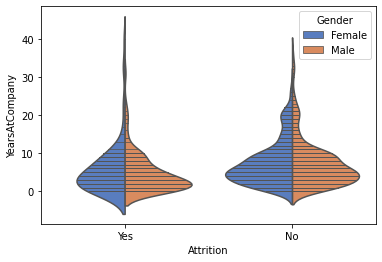

In [75]:
# Violin Plot

sns.violinplot(x="Attrition", y="YearsAtCompany", hue="Gender", data=HR_Dataset, palette="muted", split=True,
               inner="stick")# When using hue nesting with a variable that takes two levels,
                                 # setting split to True will draw half of a violin for each level. 
                                #This can make it easier to directly compare the distributions.
plt.show()

In [76]:
# Violin plots are similar to box plots but they have the capability to explain the data better. The distribution of data is measured by the width of the violin plot. Here, we have plotted the number of years spent in an organization based on gender. The middle dashed line shows the median. The lines above and below the median show the interquartile range. The denser part shows the maximum population falls under that range and thinner part shows the lesser population

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


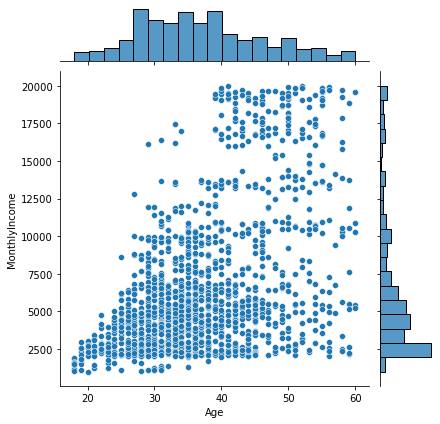

In [77]:
# Joint plot(scatter plot)

sns.jointplot(HR_Dataset.Age,HR_Dataset.MonthlyIncome, kind = "scatter")   
plt.show()

In [78]:
# Scatter plot shows the relationship between Age and Monthly Income. We can find a linear relationship. Further, the density plot above shows the distribution of age while density plot in the right shows the distribution of the monthly income.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


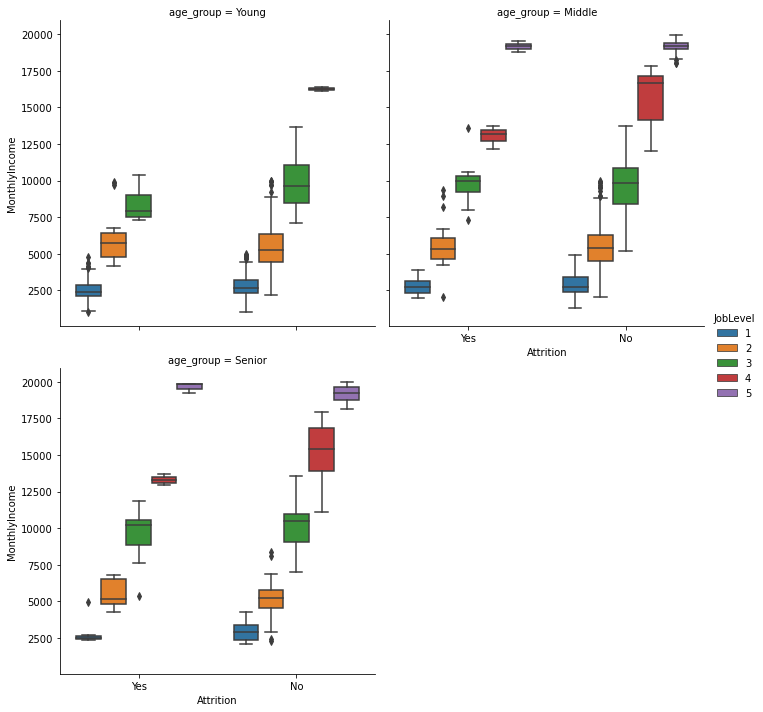

In [79]:
# Factor Plot and Facet Grid

#Slicing the continuous data into various groups 
#Age Group is the name of new column
HR_Dataset['age_group'] = pd.cut(HR_Dataset['Age'], 3, labels=['Young', 'Middle', 'Senior'])

sns.factorplot(x =   'Attrition',     # Categorical
               y =   'MonthlyIncome', # Continuous
               hue = 'JobLevel',      # Categorical
               col = 'age_group',
               col_wrap=2,            # Wrap facet after two axes
               kind = 'box',
               data = HR_Dataset)
plt.show()

In [80]:
# Above factor plot shows that monthly income plays an important role in retaining the employees in an organization. It can be observed across job levels and different age groups.

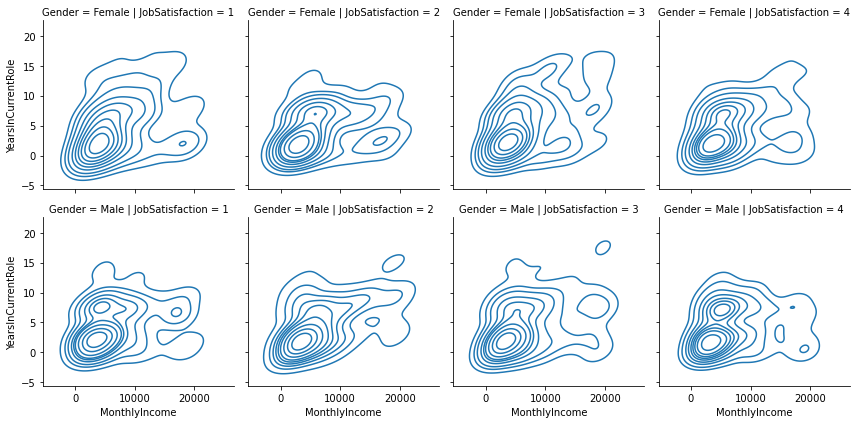

In [81]:
g = sns.FacetGrid(HR_Dataset, col="JobSatisfaction", row="Gender")
g.map(sns.kdeplot, "MonthlyIncome", "YearsInCurrentRole")
plt.show()

In [82]:
# We have created kernel density estimation plot. It displays the density distribution of two continuous variables (namely, Monthly income and years in current role). We have created facets according to different job satisfaction levels and gender.

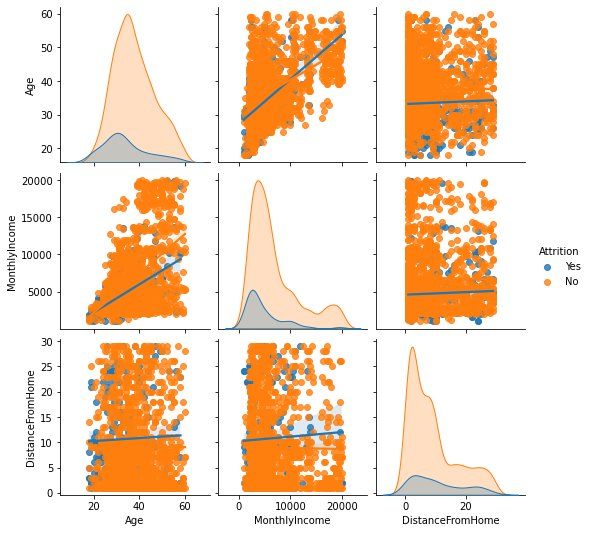

In [83]:
# Pair Plot

data1 = ['Attrition','Age','MonthlyIncome','DistanceFromHome']
sns.pairplot(HR_Dataset[data1], kind="reg", diag_kind = "kde" , hue = 'Attrition' )
plt.show()

In [84]:
# Pairwise plots between continuous variables show the relationship between them. For example. observing the relationship between Age and Monthly Income, we can find that with age, monthly income has increased but the increase is not similar for both groups

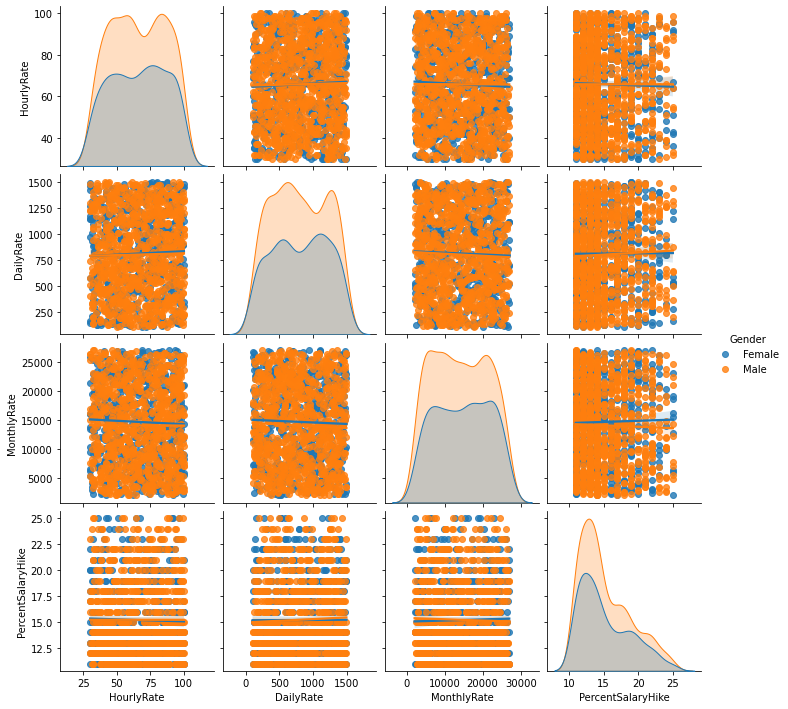

In [85]:
data2 = ['Gender', 'HourlyRate','DailyRate','MonthlyRate','PercentSalaryHike']
sns.pairplot(HR_Dataset[data2], kind="reg", diag_kind = "kde" , hue = 'Gender' )
plt.show()

In [86]:
# The above plot does not convey much of any relationship between variables across gender. This shows that hourly rate, daily rate, monthly rate and percent salary hike is same for both female and male employees.

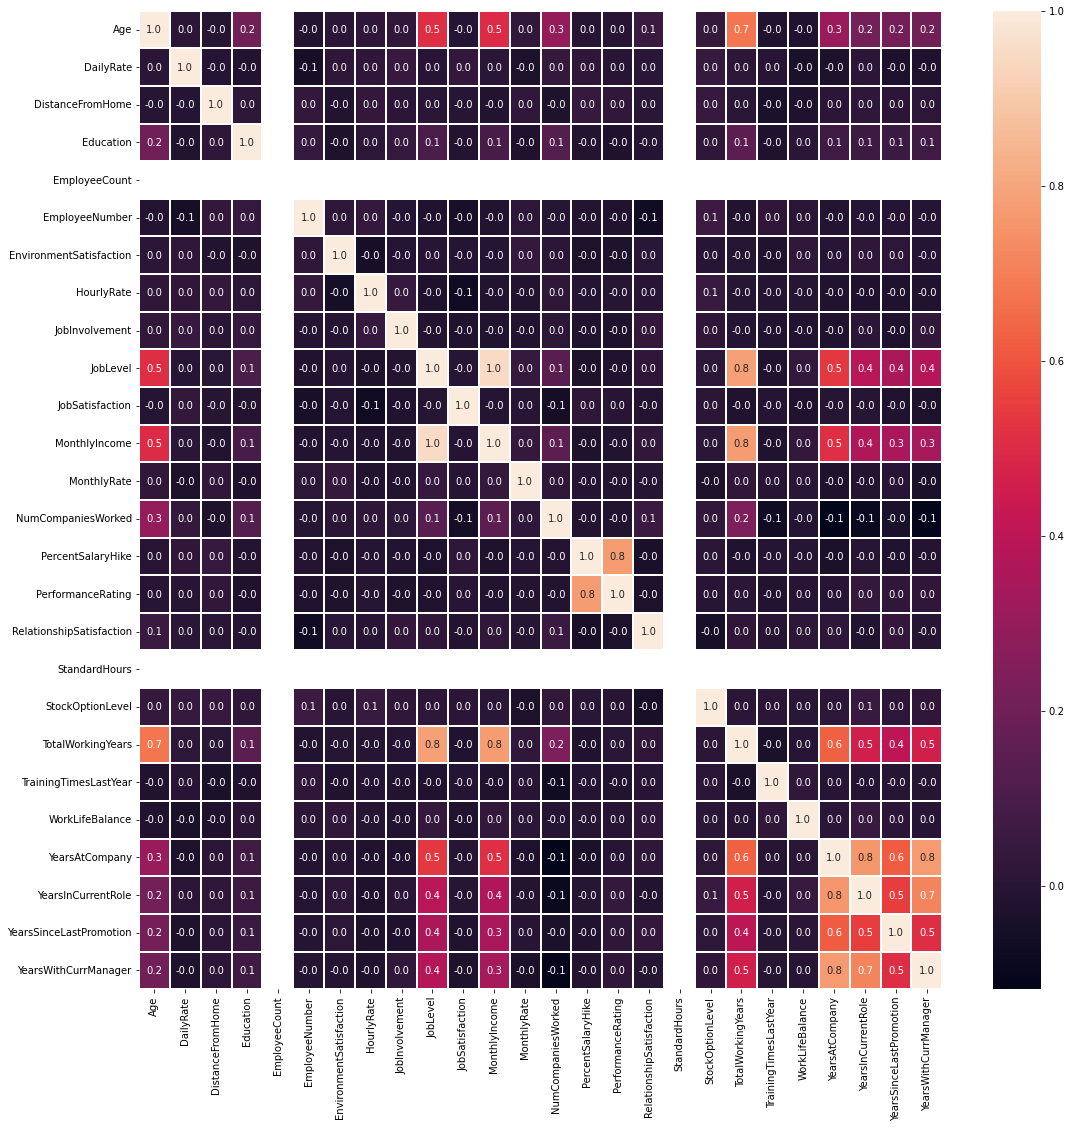

In [87]:
# Correlation (Heat) Plot

#Plot a correlation map for all numeric variables
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(HR_Dataset.corr(), annot=True, linewidths=.4, fmt= '.1f',ax=ax)
plt.show()

In [88]:
# Two variables are said to be highly correlation when they have a value of 0.7 or greater.
#The correlation plot between all continuous variables indicate that years at company and year with current manager, years in current role and years with current manager, monthly income and total working years, age and total working years, percent salary hike and performance rating are highly correlated.

In [89]:
# Dataframe datatypes
HR_Dataset.dtypes

Age                            int64
Attrition                     object
BusinessTravel                object
DailyRate                      int64
Department                    object
DistanceFromHome               int64
Education                      int64
EducationField                object
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                        object
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                       object
JobSatisfaction                int64
MaritalStatus                 object
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                        object
OverTime                      object
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StandardHours                  int64
S

In [90]:
# Empty Values
HR_Dataset.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [91]:
# Dataframe any null values
HR_Dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [92]:
# Dataframe statistical overview
HR_Dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [93]:
# Print string value counts
print(str(HR_Dataset["Attrition"].value_counts()))
print("\n" + str(HR_Dataset["BusinessTravel"].value_counts()))
print("\n" + str(HR_Dataset["Department"].value_counts()))
print("\n" + str(HR_Dataset["EducationField"].value_counts()))
print("\n" + str(HR_Dataset["Gender"].value_counts()))
print("\n" + str(HR_Dataset["JobRole"].value_counts()))
print("\n" + str(HR_Dataset["MaritalStatus"].value_counts()))
print("\n" + str(HR_Dataset["Over18"].value_counts()))
print("\n" + str(HR_Dataset["OverTime"].value_counts()))

No     1233
Yes     237
Name: Attrition, dtype: int64

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Male      882
Female    588
Name: Gender, dtype: int64

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

Y    1470
Name: Over18, dtype: int64

No     1054
Yes     416
Na

In [94]:
# Accuracy if predicting "No" attrition on all employees
print('{:.2f}%'.format((1233 / (1233 + 237)) * 100))

83.88%


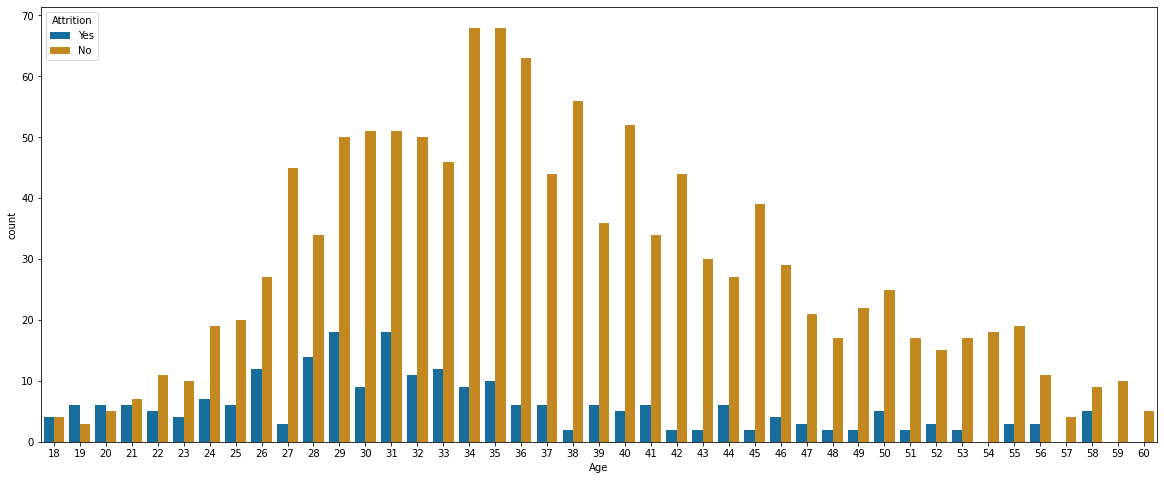

In [95]:
# Show attrition by age
plt.subplots(figsize=(20,8))
sns.countplot(x="Age", hue="Attrition", data=HR_Dataset, palette='colorblind')
plt.show()

In [96]:
# Removing useless columns
HR_Dataset.drop(["Over18","EmployeeCount","StandardHours","EmployeeNumber"],axis=1,inplace=True)

In [97]:
# Encode categorical features
for col in HR_Dataset.columns:
    if HR_Dataset[col].dtype == np.number:
        continue
    HR_Dataset[col] = LabelEncoder().fit_transform(HR_Dataset[col])

C:\Users\HP\AppData\Local\Temp/ipykernel_17116/4188227230.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if HR_Dataset[col].dtype == np.number:


In [101]:
# Reordering the dataframe, making attrition the first column
HR_Dataset.insert(0, 'Attrition', HR_Dataset.pop('Attrition'))

In [102]:
# Splitting the data
X = HR_Dataset.iloc[:, 1:HR_Dataset.shape[1]].values
Y = HR_Dataset.iloc[:, 0].values

In [103]:
# Splitting into 30% test & 70% training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [104]:
# Use random forest classifier
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [105]:
# Get accuracy on training data
forest.score(X_train, Y_train)

0.9834791059280855

In [106]:
# Get accuracy score for the model on the test data
cm = confusion_matrix(Y_test, forest.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
accuracy = (TP + TN) / (TN + TP + FN + FP)
print(cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))# Get accuracy score for the model on the test data
cm = confusion_matrix(Y_test, forest.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
accuracy = (TP + TN) / (TN + TP + FN + FP)
print(cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))

[[369   2]
 [ 60  10]]
Accuracy: 85.94%
[[369   2]
 [ 60  10]]
Accuracy: 85.94%


In [108]:
# Saving the best Model
import pickle
filename= 'HR_Analytics_model'
pickle.dump(forest,open(filename,'wb'))

In [114]:
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(X_train)

array([0, 1, 0, ..., 0, 0, 0])